In [1]:
import os, coda
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#assign trace gas measurements to a 64 x 32 grid of lat/lon bins
latbins = np.linspace(-90, 90, 32)
lonbins = np.linspace(-180, 180, 64)
alldata = np.full(4, {'ir1_ch4':np.zeros((32,64)), 'ir3_co':np.zeros((32,64)), 'uv0_o3':np.zeros((32,64)),
                    'uv1_no2':np.zeros((32,64)), 'uv3_bro':np.zeros((32,64)), 'uv4_h2co':np.zeros((32,64)),
                    'uv5_so2':np.zeros((32,64)), 'uv6_oclo':np.zeros((32,64)), 'uv7_so2':np.zeros((32,64)),
                    'uv8_h2o':np.zeros((32,64)), 'uv9_chocho':np.zeros((32,64))})
for file in os.listdir('vcds_timeresolved'):
    for idx in range(4):
        if f'oct_{idx}' in file:
            data = np.loadtxt('vcds_timeresolved/'+file)
            gas = file.split('_')[0] + '_' + file.split('_')[1]
            latloncounts = np.zeros((32,64))
            print(file)
            for i in range(len(data[0])):
                latbin = np.argmin(np.abs(data[-2][i] - latbins))
                lonbin = np.argmin(np.abs(data[-1][i] - lonbins))
                latloncounts[latbin][lonbin] += 1
                alldata[idx][gas][latbin][lonbin] += data[0][i]
            latloncounts[np.where(latloncounts==0)] = 1
            alldata[idx][gas] /= latloncounts

ir1_ch4_oct_0.txt
ir1_ch4_oct_1.txt
ir1_ch4_oct_2.txt
ir1_ch4_oct_3.txt
ir3_co_oct_0.txt
ir3_co_oct_1.txt
ir3_co_oct_2.txt
ir3_co_oct_3.txt
uv0_o3_oct_0.txt
uv0_o3_oct_1.txt
uv0_o3_oct_2.txt
uv0_o3_oct_3.txt
uv1_no2_oct_0.txt
uv1_no2_oct_1.txt
uv1_no2_oct_2.txt
uv1_no2_oct_3.txt
uv3_bro_oct_0.txt
uv3_bro_oct_1.txt
uv3_bro_oct_2.txt
uv3_bro_oct_3.txt
uv4_h2co_oct_0.txt
uv4_h2co_oct_1.txt
uv4_h2co_oct_2.txt
uv4_h2co_oct_3.txt
uv5_so2_oct_0.txt
uv5_so2_oct_1.txt
uv5_so2_oct_2.txt
uv5_so2_oct_3.txt
uv6_oclo_oct_0.txt
uv6_oclo_oct_1.txt
uv6_oclo_oct_2.txt
uv6_oclo_oct_3.txt
uv7_so2_oct_0.txt
uv7_so2_oct_1.txt
uv7_so2_oct_2.txt
uv7_so2_oct_3.txt
uv8_h2o_oct_0.txt
uv8_h2o_oct_1.txt
uv8_h2o_oct_2.txt
uv8_h2o_oct_3.txt
uv9_chocho_oct_0.txt
uv9_chocho_oct_1.txt
uv9_chocho_oct_2.txt
uv9_chocho_oct_3.txt


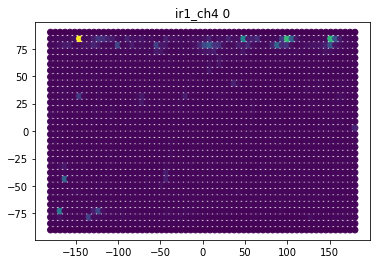

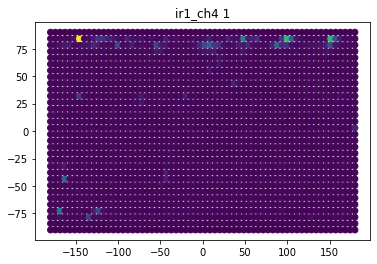

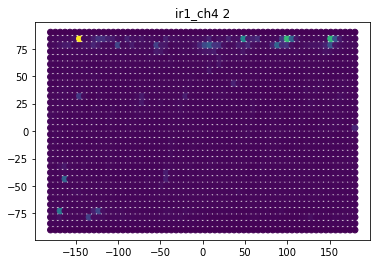

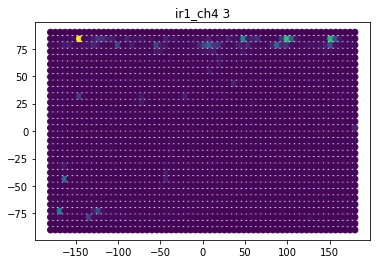

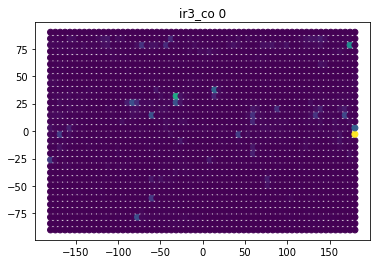

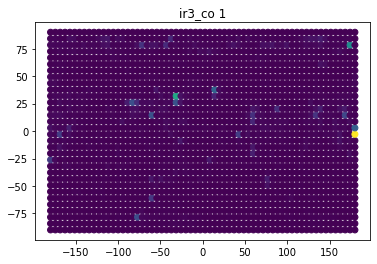

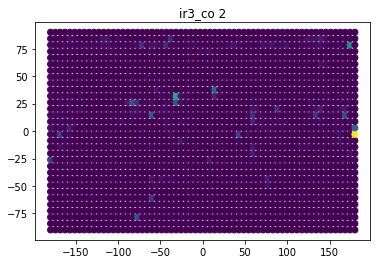

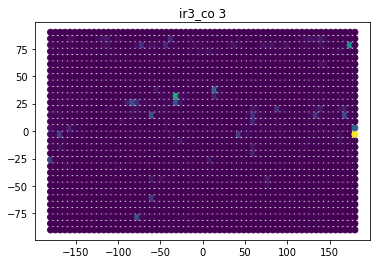

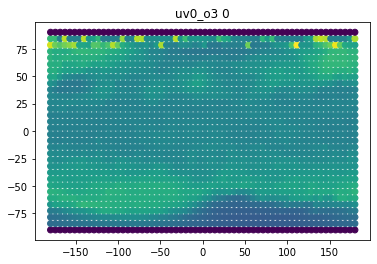

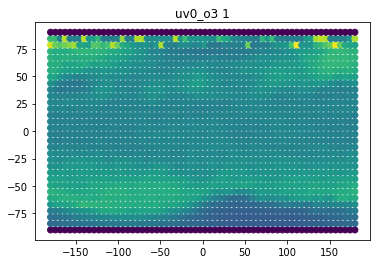

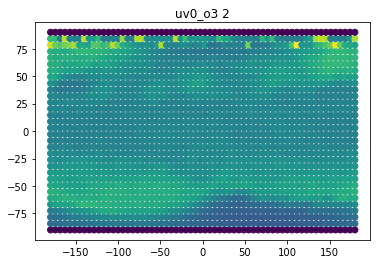

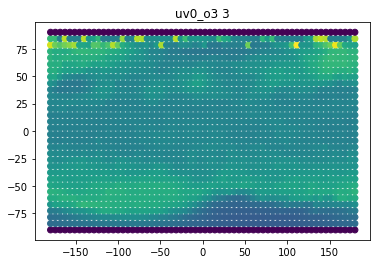

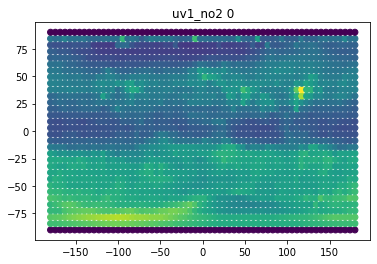

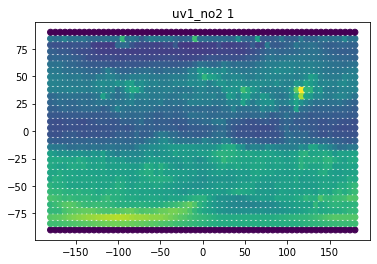

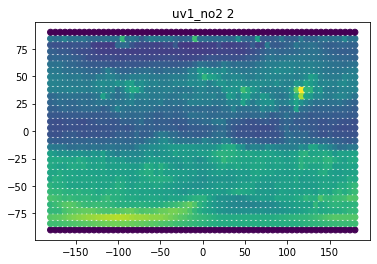

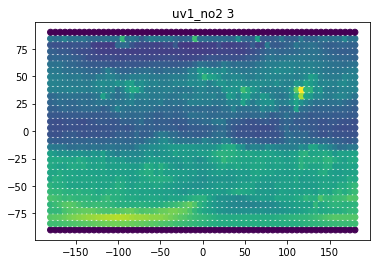

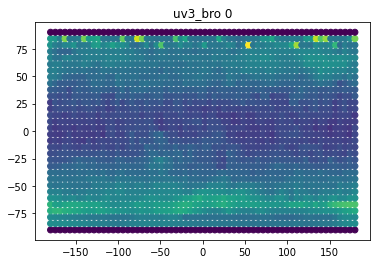

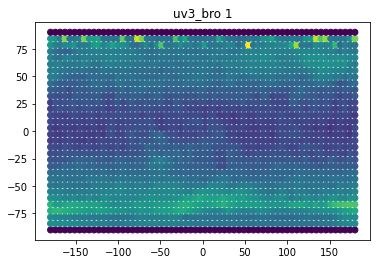

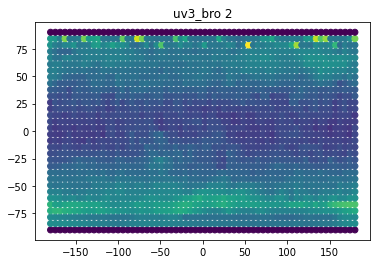

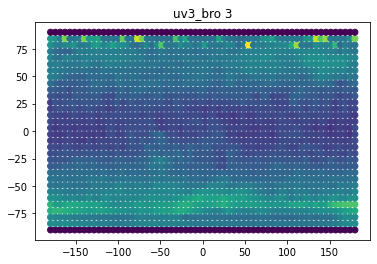

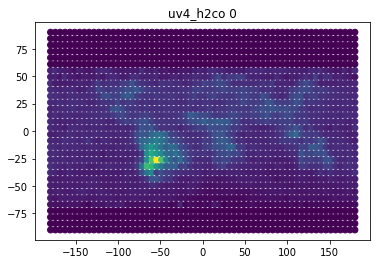

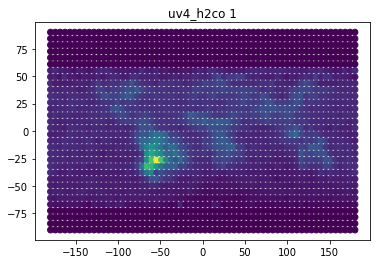

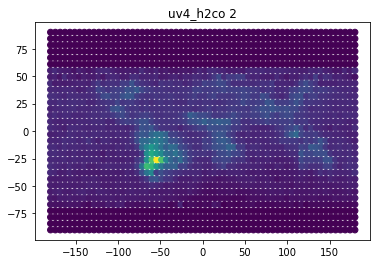

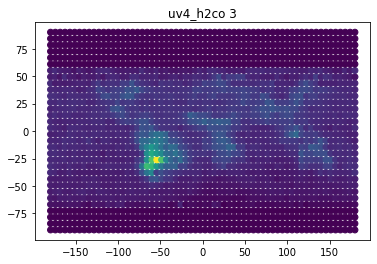

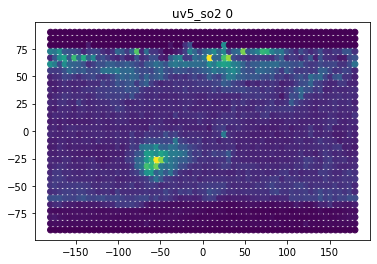

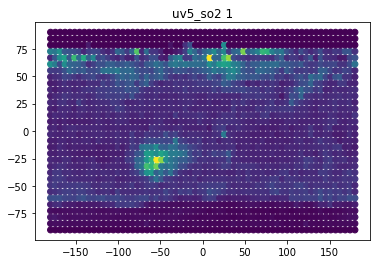

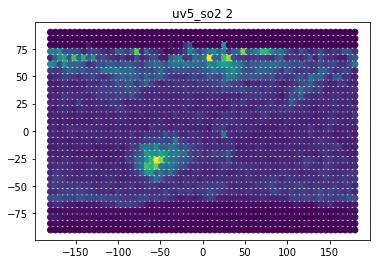

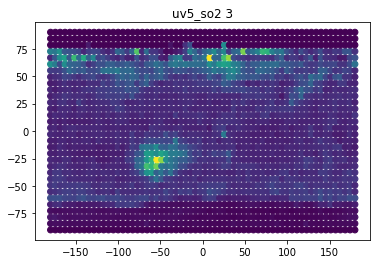

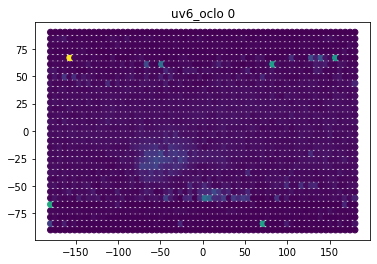

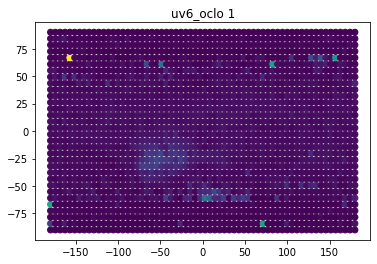

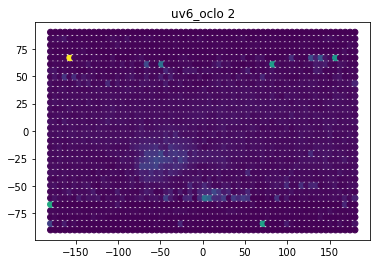

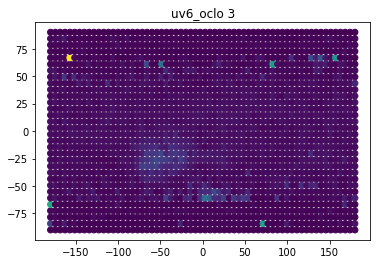

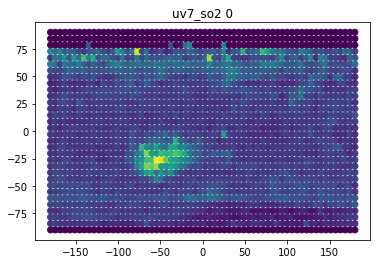

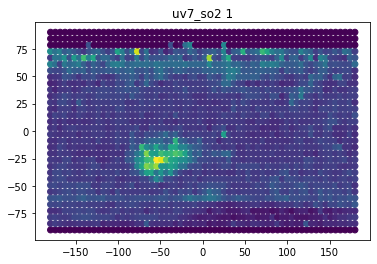

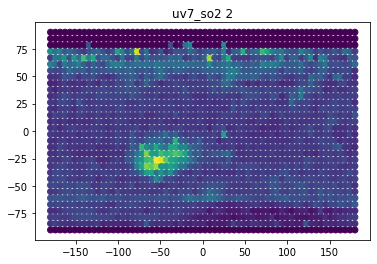

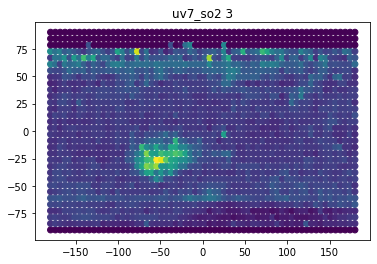

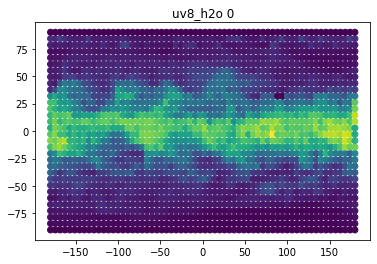

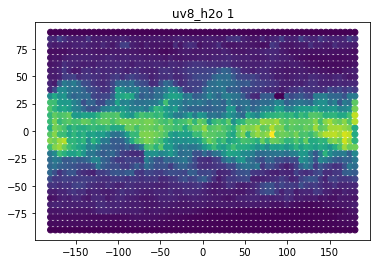

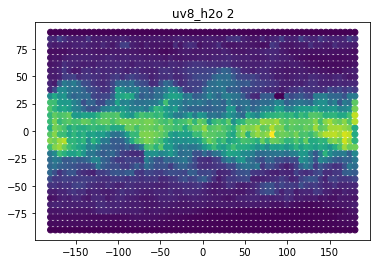

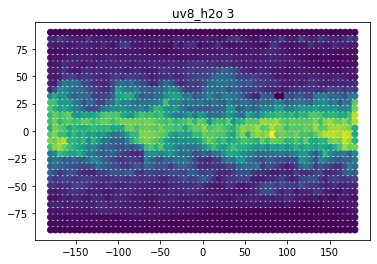

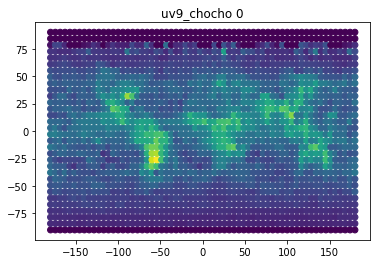

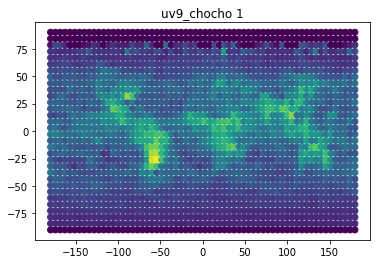

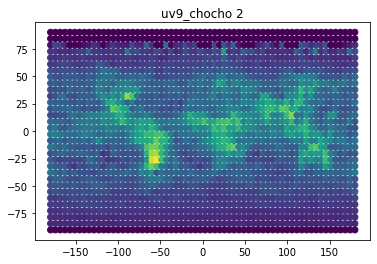

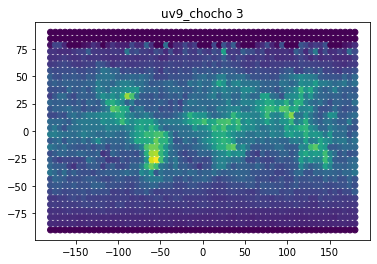

<Figure size 432x288 with 0 Axes>

In [3]:
#visualize binned trace gas maps
lat = np.repeat(np.linspace(-90, 90, 32), 64)
lon = np.tile(np.linspace(-180, 180, 64), 32)
for key in alldata[0].keys():
    for idx in range(4):
        gas = alldata[idx][key].flatten()
        plt.scatter(lon, lat, c=gas)
        plt.title(f'{key} {idx}')
        plt.show()
        plt.clf()

In [5]:
#consolidate all trace gas data into a lat-lon dataframe
import pandas as pd
df = pd.DataFrame(columns=list(alldata[0].keys()))
for idx in range(4):
    for lat in range(len(latbins)):
        for lon in range(len(lonbins)):
            latlondata = {}
            for key in alldata[idx].keys():
                latlondata[key] = alldata[idx][key][lat][lon]
            if set(latlondata.values()) != {0.0}: #ignore lat-lon bins which are all 0
                latlondata['lat'] = latbins[lat]
                latlondata['lon'] = lonbins[lon]
                df = df.append(latlondata, ignore_index=True)
df.head()

ir1_ch4        ir3_co        uv0_o3       uv1_no2       uv3_bro  \
0  3.430754e+19  2.293903e+18  5.558107e+18  3.634525e+15  5.364078e+13   
1  3.449924e+19  1.469858e+18  5.583424e+18  3.634720e+15  5.272630e+13   
2  3.489893e+19  1.669338e+18  5.657609e+18  3.671006e+15  5.267674e+13   
3  3.531416e+19  1.579774e+18  5.763560e+18  3.707401e+15  5.301487e+13   
4  3.527843e+19  2.523798e+18  5.845056e+18  3.745632e+15  5.214244e+13   

   uv4_h2co       uv5_so2      uv6_oclo       uv7_so2       uv8_h2o  \
0       0.0  5.840648e+15  3.661043e+13  5.597531e+15  5.329473e+21   
1       0.0  7.445195e+15  1.734977e+12  7.107022e+15  5.644420e+21   
2       0.0  6.680669e+15  1.560132e+12  6.391302e+15  5.693804e+21   
3       0.0  6.026304e+15  1.452079e+13  5.743603e+15  5.853894e+21   
4       0.0  5.727061e+15  8.770862e+11  5.366870e+15  6.177565e+21   

     uv9_chocho        lat         lon  
0  1.530465e+14 -84.193548 -180.000000  
1  1.510863e+14 -84.193548 -174.285714  
2  1.419633e+14 -84.193548 -168.571429  
3  1.435909e+14 -84.193548 -162.857143  
4  1.495391e+14 -84.193548 -157.142857

In [6]:
df.to_csv('oct.csv', index=False)

In [24]:
#now we can just follow the standard PCA procedure
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features = list(df.keys())
features.remove('lat')
features.remove('lon')
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
                                                                 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])

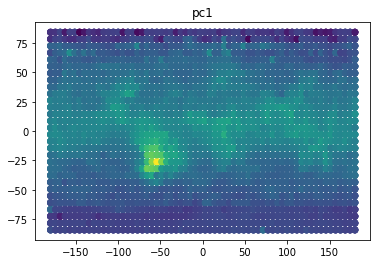

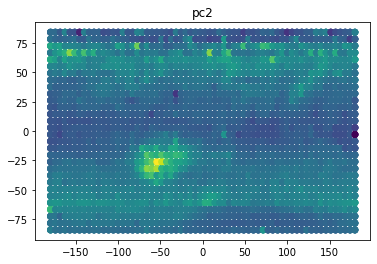

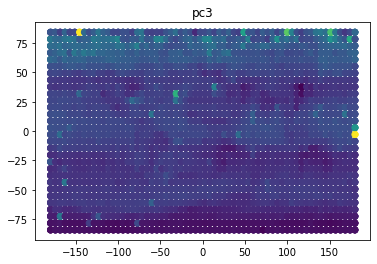

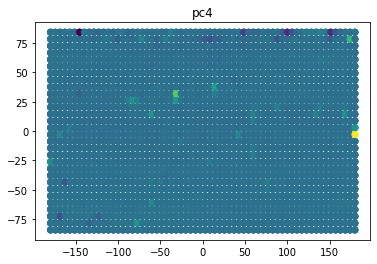

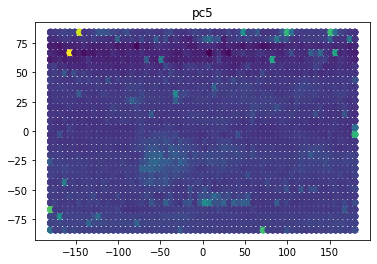

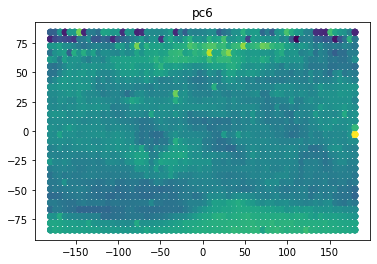

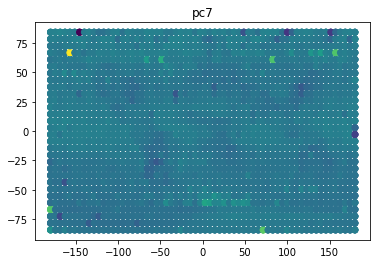

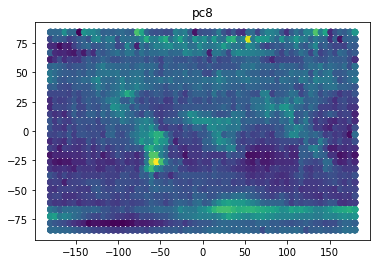

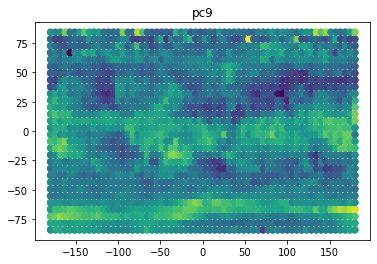

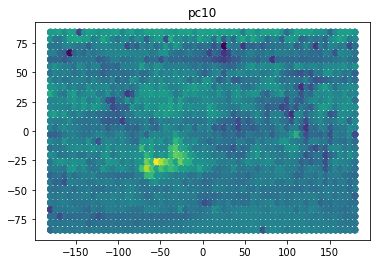

<Figure size 432x288 with 0 Axes>

In [25]:
for pc in principalDf.columns:
    plt.scatter(df['lon'], df['lat'], c=list(principalDf[pc]))
    plt.title(f'{pc}')
    plt.show()
    plt.clf()

Text(0, 0.5, 'Variance Fraction (%)')

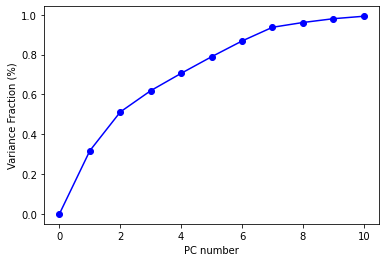

In [26]:
frac = []
for i in range(11):
    frac.append(np.sum(pca.explained_variance_ratio_[:i]))
plt.plot(frac, marker='o', color='b')
plt.xlabel('PC number')
plt.ylabel('Variance Fraction (%)')

In [27]:
pca.explained_variance_ratio_

array([0.31748917, 0.19461862, 0.10696867, 0.0871308 , 0.08337909,
       0.07902404, 0.0689269 , 0.02399946, 0.01903263, 0.01239927])